371024 Introducción al Aprendizaje Máquina  
Proyecto Segundo Parcial  
`Lic. Jose Ricardo Mendoza Villar`

# 1. Escoger una base de datos de kaggle con al menos 5 columnas para comparar un modelo de k vecinos más cercanos y un modelo de árboles de decisión, incluir el link a la base de datos.
- Base de Datos: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("winequality-red.csv")

In [4]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


# 2. Escoger una de las columnas de la base de datos como variable objetivo, la variable objetivo debe tomar al menos tres valores (etiquetas).

In [9]:
y = df["quality"].apply(lambda x: 'Baja' if x <= 4 else 'Media' if x <= 6 else 'Alta')

In [10]:
y.value_counts() # Clases no balanceadas

quality
Media    1319
Alta      217
Baja       63
Name: count, dtype: int64

# 3. Las columnas restantes serán utilizadas como variables descriptivas.

In [11]:
X = df.drop("quality", axis = 1)

# 4. Entrenar un modelo de k vecinos más cercanos utilizando todas las variables descriptivas, hacer una búsqueda para determinar el número de vecinos k que produce el mejor modelo.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify = y,
    random_state=20250517
)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

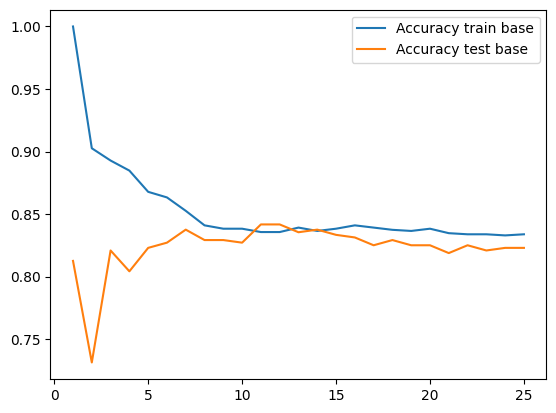

In [35]:
# Busqueda del hiperparámetro K
score_train = {}
score_test = {}
for k in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    score_train[k] = knn.score(X_train, y_train)
    score_test[k]= knn.score(X_test, y_test)
plt.plot(score_train.keys(), score_train.values(), label = 'Accuracy train base')
plt.plot(score_test.keys(), score_test.values(), label = 'Accuracy test base')
plt.legend()
plt.show()

In [40]:
# Mejor modelo con 14 vecinos
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

# 5. Entrenar un modelo de árboles de decisión utilizando todas las variables descriptivas.

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
tree = DecisionTreeClassifier(random_state = 20250517)

In [44]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=20250517)

# 6. Obtener la exactitud (accuracy) y el reporte de clasificación de ambos modelos. ¿Qué modelo resulta ser mejor? ¿Puede intentar explicar por qué uno es mejor que otro para la base de datos que se está utilizando?

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
print(f"{'-'*20} KNN {'-'*20}")
print(f"Accuracy Train: {score_train[12]}")
print(f"Accuracy Test: {score_test[12]}")
print(confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))
print(f"{'-'*20} Árbol de Decisión {'-'*20}")
print(f"Accuracy Train: {tree.score(X_train, y_train)}")
print(f"Accuracy Test: {tree.score(X_test, y_test)}")
print(confusion_matrix(y_test, tree.predict(X_test)))
print(classification_report(y_test, tree.predict(X_test)))

-------------------- KNN --------------------
Accuracy Train: 0.8355674709562109
Accuracy Test: 0.8416666666666667
[[  9   0  56]
 [  0   0  19]
 [  2   1 393]]
              precision    recall  f1-score   support

        Alta       0.82      0.14      0.24        65
        Baja       0.00      0.00      0.00        19
       Media       0.84      0.99      0.91       396

    accuracy                           0.84       480
   macro avg       0.55      0.38      0.38       480
weighted avg       0.80      0.84      0.78       480

-------------------- Árbol de Decisión --------------------
Accuracy Train: 1.0
Accuracy Test: 0.8354166666666667
[[ 35   0  30]
 [  1   3  15]
 [ 22  11 363]]
              precision    recall  f1-score   support

        Alta       0.60      0.54      0.57        65
        Baja       0.21      0.16      0.18        19
       Media       0.89      0.92      0.90       396

    accuracy                           0.84       480
   macro avg       0.57   

Si solo nos fijaramos en la métrica de accuracy, practicamente ambos modelos resultan "igual" de buenos, ambos con 0.84 de resultado, sin embargo, si nos fijamos a mas detalle en cada una de las clases con el reporte de clasificación, el modelo knn no predice correctamente ningún vino en la clase "Baja", para la clase "Media" tiene resultados buenos (bastante homogeneos) pero un recall muy bajo en la clase "Alta", es decir, el modelo es predice incorrectamente vinos de la clase de tipo "Media" a los que le pone el valor de "Alta" en la prediccón, está sobreestimados la calidad de los vinos (que en un contexto de venta esto podria producir precios altos de venta para vinos que no tienen la calidad correspondiente"), para el caso del árbol de decisión tiene metricas mas bajas en la clase "Alta" y clasifica de forma correcta pocos vinos del tipo "Baja", para el caso de la clase "Media" tiene una mejor precision pero menor recall, es decir, hay algunos vinos que los predice en una clase diferente a la clase "Media", en general creo que ambos modelos son buenos en la detección de la clase "Media" con sutiles diferencias en su relación recall vs precision, sin embargo son muy malos en el resto de clases, dependiente el contexto del problema estas diferencias serian utiles, pero en lo general, convendria un modelo más variado en el sentido de que prediga otras clases, fijandonos en el f1-score que calcula la media armonica entre estas dos métricas, el modelo de árboles de decisión resulta mejor